# fast_food_consumption_health_impact


#TO BULID A MACHINE LEARNING MODEL THAT PREDICTS A PERSONS HEALTH RISK LEVEL OR BMI BASED ON THEIR FAST FOOD CONSUMPTION HABITS AND LIFE STYLE DATA

# import libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import joblib

# data load

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("fast_food_consumption_health_impact_dataset.csv")

print(df.head())


   Age  Gender  Fast_Food_Meals_Per_Week  Average_Daily_Calories   BMI  \
0   56    Male                         1                    3153  28.4   
1   46    Male                        12                    1748  22.8   
2   32  Female                         8                    3020  21.5   
3   25  Female                         6                    2621  26.8   
4   38  Female                        14                    2260  18.1   

   Physical_Activity_Hours_Per_Week  Sleep_Hours_Per_Day  Energy_Level_Score  \
0                               4.5                  7.8                   9   
1                               9.6                  6.7                   2   
2                               4.0                  7.4                   2   
3                               8.4                  6.1                   6   
4                               1.9                  7.7                   7   

  Digestive_Issues  Doctor_Visits_Per_Year  Overall_Health_Score  
0      

# data understanding

In [3]:
# First 5 rows
df.head()

# Last 5 rows
df.tail()

# Shape (rows, columns)
df.shape

# Info about data types & null values
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               800 non-null    int64  
 1   Gender                            800 non-null    object 
 2   Fast_Food_Meals_Per_Week          800 non-null    int64  
 3   Average_Daily_Calories            800 non-null    int64  
 4   BMI                               800 non-null    float64
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64
 6   Sleep_Hours_Per_Day               800 non-null    float64
 7   Energy_Level_Score                800 non-null    int64  
 8   Digestive_Issues                  800 non-null    object 
 9   Doctor_Visits_Per_Year            800 non-null    int64  
 10  Overall_Health_Score              800 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 68.9+ KB


,Age,Fast_Food_Meals_Per_Week,Average_Daily_Calories,BMI,Physical_Activity_Hours_Per_Week,Sleep_Hours_Per_Day,Energy_Level_Score,Doctor_Visits_Per_Year,Overall_Health_Score
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,38.802500,6.818750,2554.728750,26.43900,4.938000,6.472875,4.903750,5.648750,4.922500
std,12.055919,4.329183,551.078974,4.94144,2.860272,1.429232,2.587538,3.467045,2.681974
min,18.000000,0.000000,1600.000000,18.00000,0.000000,4.000000,1.000000,0.000000,1.000000
25%,29.000000,3.000000,2084.750000,22.50000,2.400000,5.200000,3.000000,3.000000,3.000000
50%,40.000000,7.000000,2540.500000,26.40000,4.900000,6.500000,5.000000,6.000000,5.000000
75%,49.000000,11.000000,3049.000000,30.62500,7.400000,7.700000,7.000000,9.000000,7.000000
max,59.000000,14.000000,3499.000000,35.00000,10.000000,9.000000,9.000000,11.000000,9.000000


# data preprocessing

In [4]:
# Check null values
df.isnull().sum()

# Fill numeric nulls with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical nulls with mode
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
# Example: removing ID column if present
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)


In [7]:
# Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)


# feature engineering

In [8]:
# Example: creating new feature
if 'Fast_Food_Meals_Per_Week' in df.columns and 'Physical_Activity_Hours_Per_Week' in df.columns:
    df['Lifestyle_Index'] = df['Fast_Food_Meals_Per_Week'] / (df['Physical_Activity_Hours_Per_Week'] + 1)

# feature scaling

In [9]:
# Define features and target
X = df.drop('Overall_Health_Score', axis=1)
y = df['Overall_Health_Score']

# Save feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# splitting data

# model selection

# linear regression

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# support vector regression

In [15]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


# random forest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

# polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


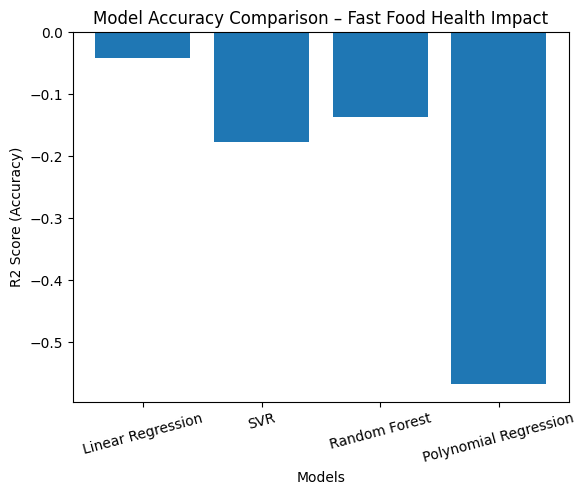

In [17]:
# R2 scores for each model
r2_scores = {
    "Linear Regression": r2_score(y_test, lr_model.predict(X_test_scaled)),
    "SVR": r2_score(y_test, svr_model.predict(X_test_scaled)),
    "Random Forest": r2_score(y_test, rf_model.predict(X_test_scaled)),
    "Polynomial Regression": r2_score(y_test, poly_model.predict(X_test_poly))
}

# Bar graph
plt.figure()
plt.bar(r2_scores.keys(), r2_scores.values())
plt.xlabel("Models")
plt.ylabel("R2 Score (Accuracy)")
plt.title("Model Accuracy Comparison – Fast Food Health Impact")
plt.xticks(rotation=15)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

# model prediction and evaluation

In [18]:
# Find the model with the highest accuracy
best_model = max(r2_scores, key=r2_scores.get)
highest_accuracy = r2_scores[best_model]

print(f"The model with the highest accuracy is {best_model} with an R2 score of {highest_accuracy:.4f}")

The model with the highest accuracy is Linear Regression with an R2 score of -0.0414


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 7.449006875
R2 Score: -0.13749717257999094


# save model and scaler

In [20]:
import joblib

# Save model
joblib.dump(rf_model, "health_prediction_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model & Scaler Saved Successfully")


Model & Scaler Saved Successfully
